# From raw XYZ to clean selected data --- Selecting columns to work

### After areal survey, the geoscientist have to treat the data collected and save it to a organized database. So here, we'll learn how to use some functions of the GeoDataProcessing Python Libraries.

##### The first thing that we have to do is to learn what are theese libraries and which of them we'll use.

### Importing the libraries
##### numpy https://numpy.org/doc/stable/user/quickstart.html#

In [6]:
%matplotlib notebook
import numpy as np

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj

import verde as vd
import pooch
import rasterio as rio

In [7]:
plt.rcParams['figure.dpi'] = 120

In [8]:
scrr_treino = pd.read_csv('../resources/csv/socorro/scrr_treino.csv')
scrr_test = pd.read_csv('../resources/csv/socorro/scrr_test.csv')

In [9]:
scrr_treino

Unnamed: 0           UTME          UTMN        LON        LAT    MAGR  \
0          430030  310829.749912  7.509972e+06 -46.839050 -22.506271  107.60   
1          430031  310830.976189  7.509872e+06 -46.839050 -22.507172  110.65   
2          430032  310833.764871  7.509771e+06 -46.839035 -22.508087  111.70   
3          430033  310835.011649  7.509669e+06 -46.839035 -22.509003  113.76   
4          430034  310836.236697  7.509570e+06 -46.839035 -22.509903  114.81   
...           ...            ...           ...        ...        ...     ...   
17364      533427  344829.389224  7.504464e+06 -46.509155 -22.559448  393.64   
17365      533428  344931.402944  7.504465e+06 -46.508163 -22.559448  364.62   
17366      533429  345031.771250  7.504466e+06 -46.507187 -22.559448  327.59   
17367      533430  345130.596978  7.504467e+06 -46.506226 -22.559448  297.56   
17368      533431  345226.337587  7.504468e+06 -46.505295 -22.559448  276.54   

          THC     UC     KC      CTC  \
0       26.44  21.64  45.96   780.37   
1       23.14  19.36  46.49   708.45   
2       23.14  17.46  43.83   644.47   
3       25.62   6.91  40.63   689.69   
4       26.84  18.27  27.77   721.32   
...       ...    ...    ...      ...   
17364   81.34   9.73  13.51  1200.66   
17365  121.82   6.40   0.12  1405.71   
17366  130.11  11.86  45.08  1551.80   
17367  127.84   0.60  30.97  1539.77   
17368  115.50   9.65  49.44  1522.42   

                                          geometry  
0      POINT (310829.7499122204 7509971.815005993)  
1      POINT (310830.9761894136 7509872.044144746)  
2      POINT (310833.7648710561 7509770.741974251)  
3      POINT (310835.0116493448 7509669.310090899)  
4      POINT (310836.2366968184 7509569.649933428)  
...                                            ...  
17364  POINT (344829.3892241826 7504463.741517313)  
17365  POINT (344931.4029444201 7504464.772270864)  
17366  POINT (345031.7712498344 7504465.785737272)  
17367  POINT (345130.5969783488 7504466.782986226)  
17368   POINT (345226.3375869556 7504467.74849641)  

[17369 rows x 11 columns]

In [10]:
scrr_treino['THC/KC'] = scrr_treino['THC']/scrr_treino['KC']
scrr_treino['KC/CTC'] = scrr_treino['KC']/scrr_treino['CTC']

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
scrr_treino.drop('Unnamed: 0', axis='columns', inplace=True)

In [12]:
scrr_treino

UTME          UTMN        LON        LAT    MAGR     THC  \
0      310829.749912  7.509972e+06 -46.839050 -22.506271  107.60   26.44   
1      310830.976189  7.509872e+06 -46.839050 -22.507172  110.65   23.14   
2      310833.764871  7.509771e+06 -46.839035 -22.508087  111.70   23.14   
3      310835.011649  7.509669e+06 -46.839035 -22.509003  113.76   25.62   
4      310836.236697  7.509570e+06 -46.839035 -22.509903  114.81   26.84   
...              ...           ...        ...        ...     ...     ...   
17364  344829.389224  7.504464e+06 -46.509155 -22.559448  393.64   81.34   
17365  344931.402944  7.504465e+06 -46.508163 -22.559448  364.62  121.82   
17366  345031.771250  7.504466e+06 -46.507187 -22.559448  327.59  130.11   
17367  345130.596978  7.504467e+06 -46.506226 -22.559448  297.56  127.84   
17368  345226.337587  7.504468e+06 -46.505295 -22.559448  276.54  115.50   

          UC     KC      CTC                                     geometry  \
0      21.64  45.96   780.37  POINT (310829.7499122204 7509971.815005993)   
1      19.36  46.49   708.45  POINT (310830.9761894136 7509872.044144746)   
2      17.46  43.83   644.47  POINT (310833.7648710561 7509770.741974251)   
3       6.91  40.63   689.69  POINT (310835.0116493448 7509669.310090899)   
4      18.27  27.77   721.32  POINT (310836.2366968184 7509569.649933428)   
...      ...    ...      ...                                          ...   
17364   9.73  13.51  1200.66  POINT (344829.3892241826 7504463.741517313)   
17365   6.40   0.12  1405.71  POINT (344931.4029444201 7504464.772270864)   
17366  11.86  45.08  1551.80  POINT (345031.7712498344 7504465.785737272)   
17367   0.60  30.97  1539.77  POINT (345130.5969783488 7504466.782986226)   
17368   9.65  49.44  1522.42   POINT (345226.3375869556 7504467.74849641)   

            THC/KC    KC/CTC  
0         0.575283  0.058895  
1         0.497741  0.065622  
2         0.527949  0.068009  
3         0.630569  0.058911  
4         0.966511  0.038499  
...            ...       ...  
17364     6.020725  0.011252  
17365  1015.166667  0.000085  
17366     2.886202  0.029050  
17367     4.127866  0.020113  
17368     2.336165  0.032475  

[17369 rows x 12 columns]

### Projections

### lat_ts (latitude of the true scalle ) = the mean value of the LAT of the survey

In [13]:
projection = pyproj.Proj(proj='utm', zone='23s', EPGS ='32723')

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
coordinates = (scrr_treino.UTME.values, scrr_treino.UTMN.values)
coordinates

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([310829.74991222, 310830.97618941, 310833.76487106, ...,
        345031.77124983, 345130.59697835, 345226.33758696]),
 array([7509971.81500599, 7509872.04414475, 7509770.74197425, ...,
        7504465.78573727, 7504466.78298623, 7504467.74849641]))

<IPython.core.display.Javascript object>


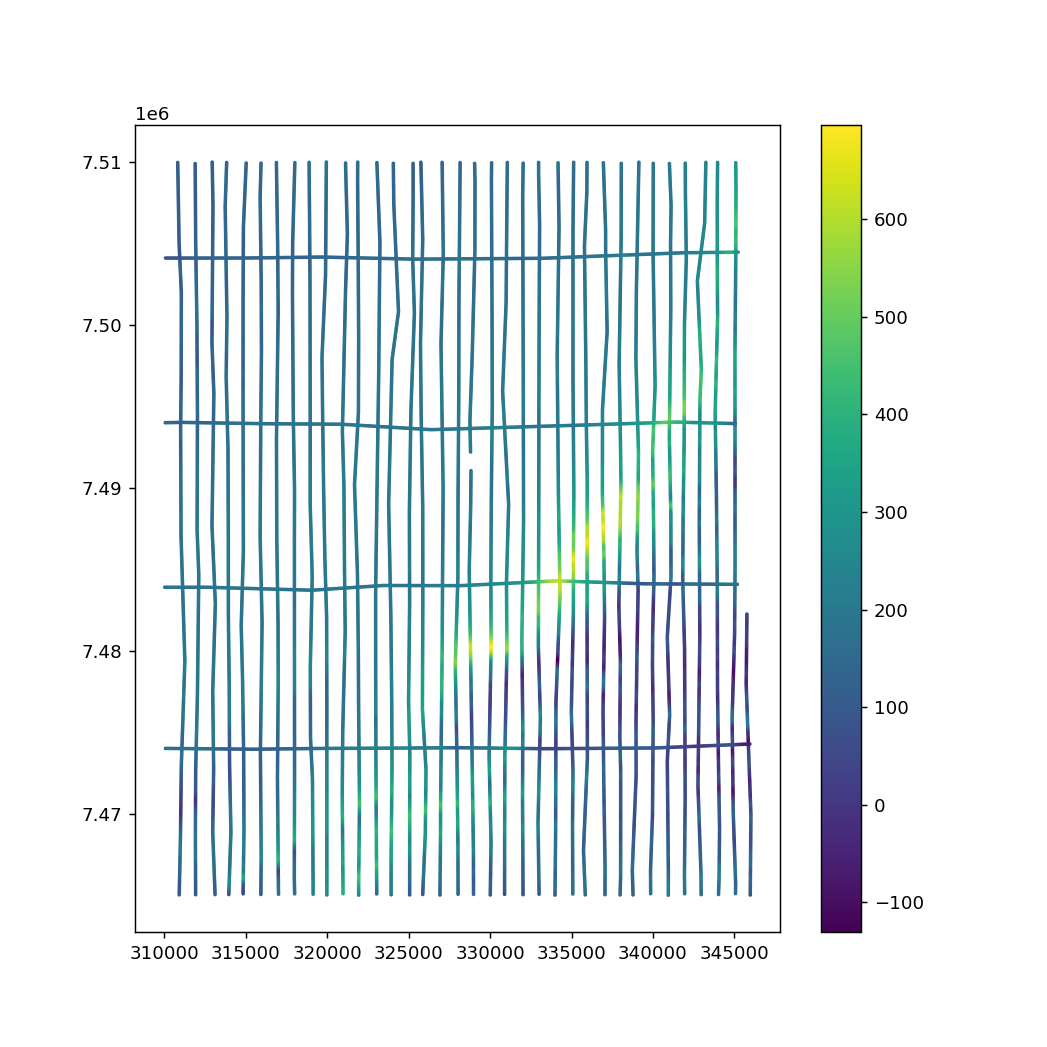

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(coordinates[0],coordinates[1],
           c=scrr_treino.MAGR, s=1)
plt.axis('scaled')
plt.colorbar()

## Now we have to create a regular grid, decimating the data reducing the alliasing effect by a fuction called reduce.

In [16]:
reducer = vd.BlockReduce(np.median, spacing=250)

In [17]:
b_coords, b_MAGR = reducer.filter(coordinates, scrr_treino.MAGR)

#b_THC, b_UC, b_KC,b_CTC = reducer.filter(coordinates, scrr_1039.THC, scrr_1039.UC, scrr_1039.KC, scrr_1039.CTC)


In [18]:
b_coords

(array([310923.75600989, 311927.60727272, 313116.99080239, ...,
        343244.03595978, 343966.1543416 , 345082.54377122]),
 array([7465123.16902567, 7465130.61481677, 7465136.98017162, ...,
        7509876.41440105, 7509878.6593225 , 7509857.93667778]))

In [19]:
scrr_treino.shape

(17369, 12)

In [20]:
b_MAGR.shape

(6886,)

###  Here we visualize the residual points after the blocked reductionm and observe that the sampled points are not perfect

<IPython.core.display.Javascript object>


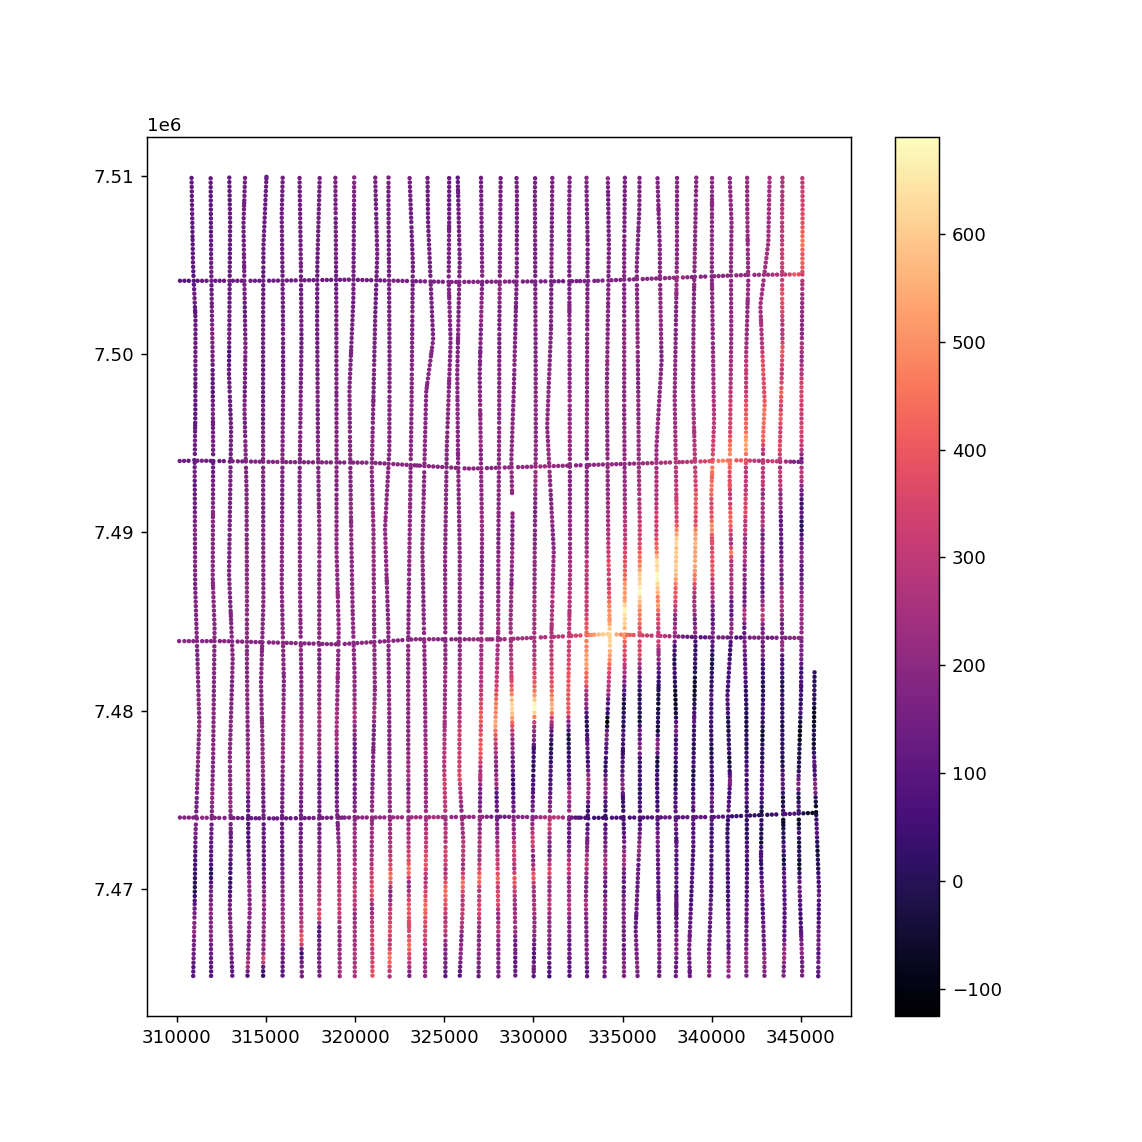

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(b_coords[0],b_coords[1],
            c    = b_MAGR,
            cmap = 'magma',
            s    = 2)
plt.axis('scaled')
plt.colorbar()

In [22]:
b_MAGR.shape

(6886,)

In [23]:
scrr_treino.shape

(17369, 12)

### Gridding with splines

##### calculating the function that describes the behavior of the geospatial data.

In [24]:
spline = vd.Spline()

In [25]:
spline.fit(b_coords, b_MAGR)

Spline()

###  Predicting the real non decimated data

In [26]:
predicted = spline.predict(coordinates)

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


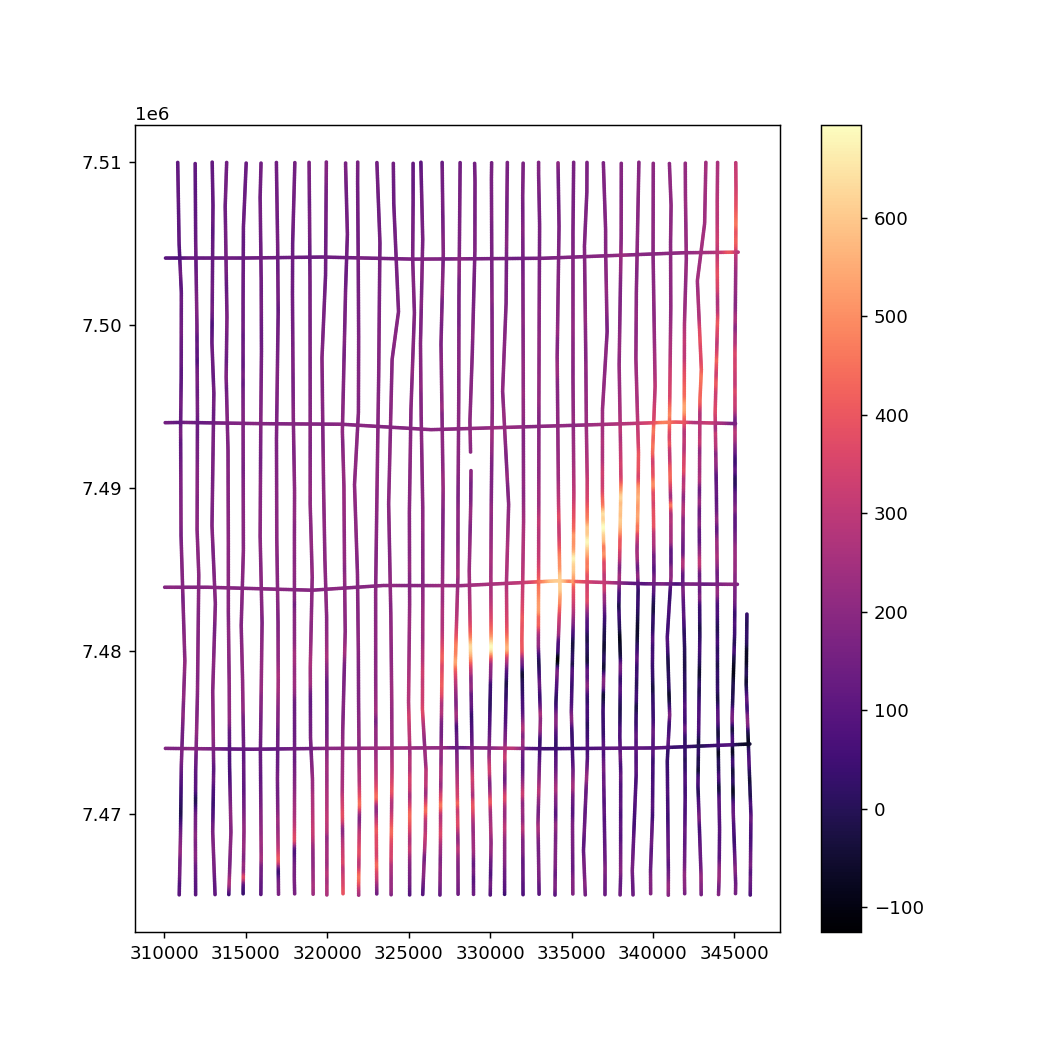

In [27]:
plt.figure(figsize=(8,8))
plt.scatter(coordinates[0],coordinates[1],
            c=predicted,
            cmap='magma',
            s=1)
plt.axis('scaled')
plt.colorbar()

### Calculating the difference between the raw data and the predicted.

In [28]:
residuals = scrr_treino.MAGR - predicted

<IPython.core.display.Javascript object>


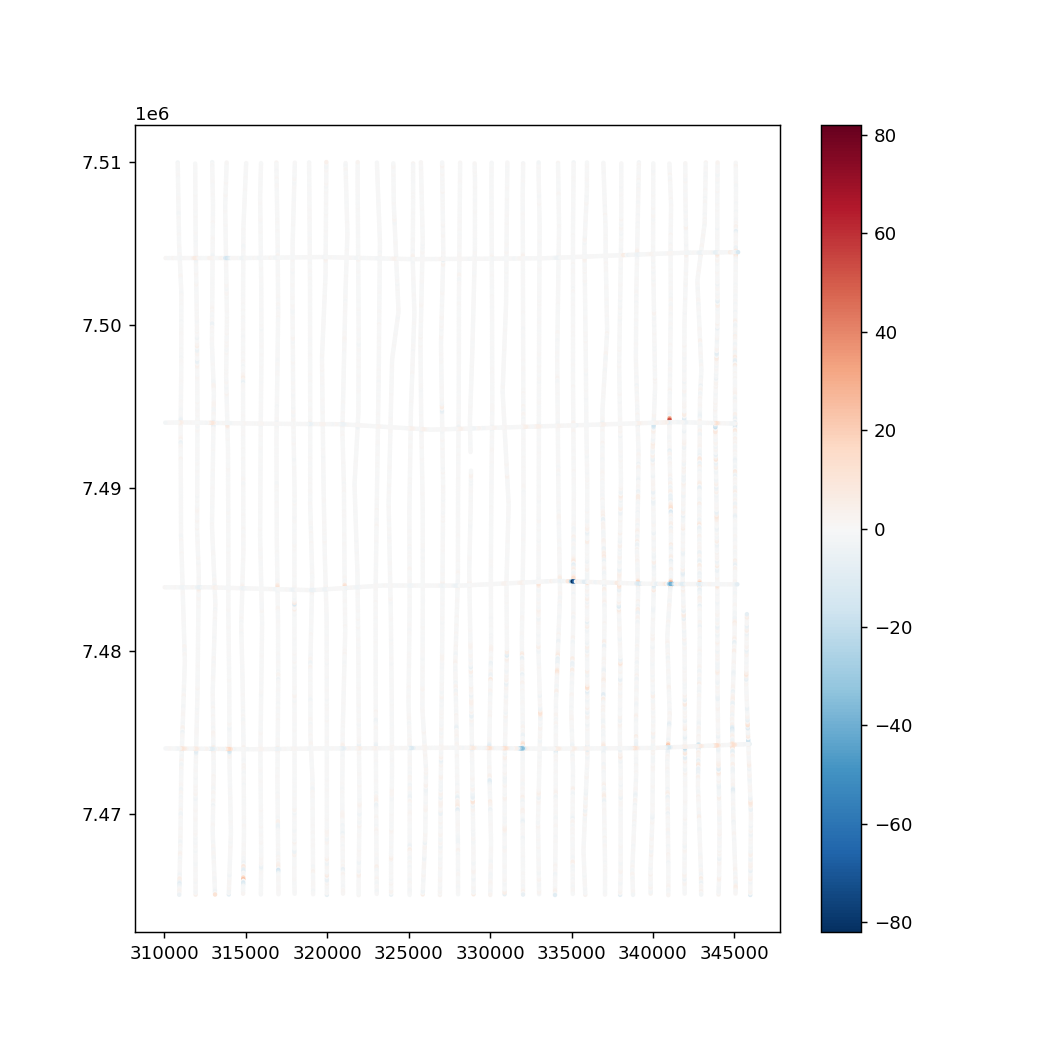

In [29]:
scale = vd.maxabs(residuals)

plt.figure(figsize=(8,8))
plt.scatter(coordinates[0],coordinates[1],
            c=residuals,
            cmap='RdBu_r',
            s=2,
            vmin=-scale,vmax=scale)
plt.axis('scaled')
plt.colorbar()

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


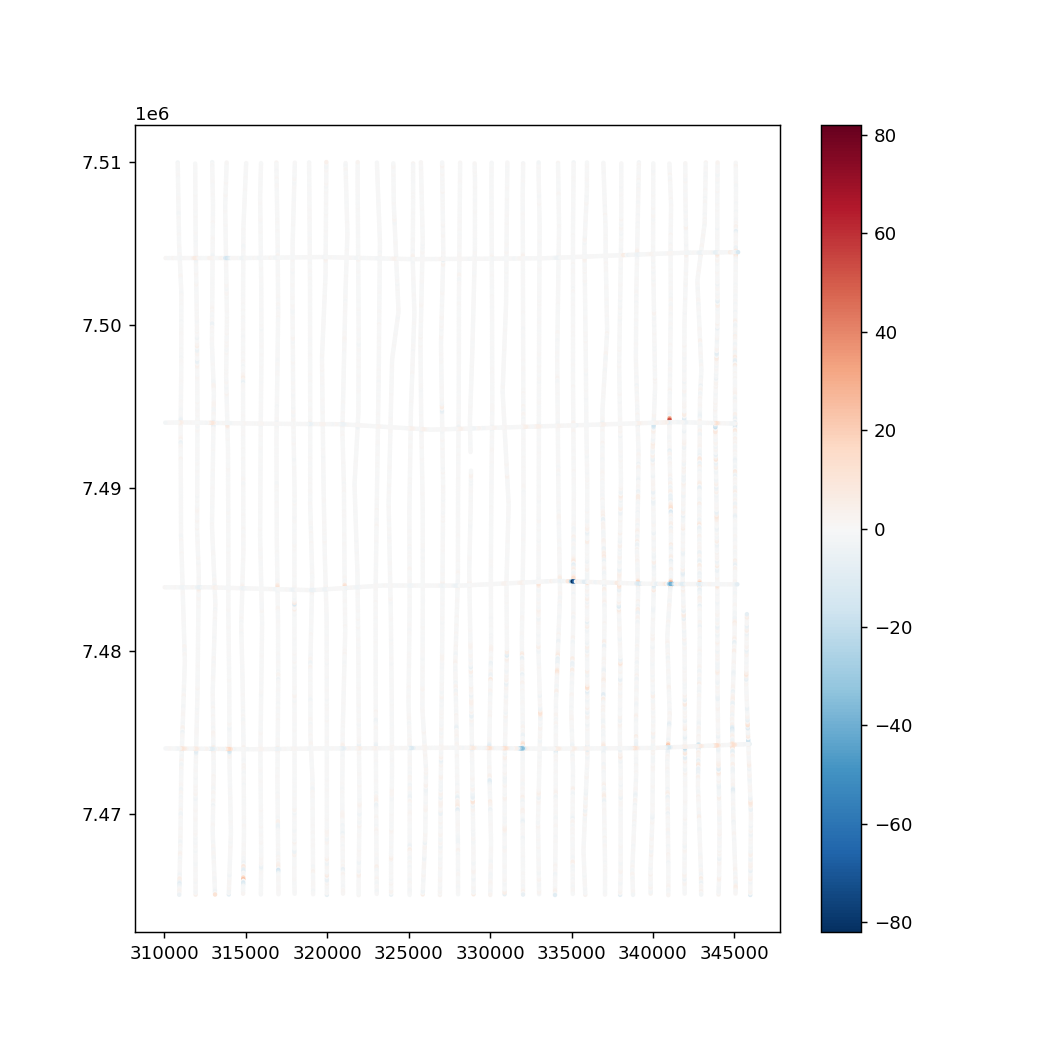

In [58]:
scale = vd.maxabs(residuals)

plt.figure(figsize=(8,8))
plt.scatter(coordinates[0],coordinates[1],
            c=residuals,
            cmap='RdBu_r',
            s=2,
            vmin=-scale,vmax=scale)
plt.axis('scaled')
plt.colorbar()

###  Now generating a pixel data from point data

In [30]:
region = vd.get_region(coordinates)
grid_coords = vd.grid_coordinates(region, spacing = 200)

# This griding resolution is 5x the real data resolution (1000m)

In [31]:
grid_coords

(array([[310032.55099465, 310232.43667407, 310432.32235349, ...,
         345612.20193093, 345812.08761035, 346011.97328976],
        [310032.55099465, 310232.43667407, 310432.32235349, ...,
         345612.20193093, 345812.08761035, 346011.97328976],
        [310032.55099465, 310232.43667407, 310432.32235349, ...,
         345612.20193093, 345812.08761035, 346011.97328976],
        ...,
        [310032.55099465, 310232.43667407, 310432.32235349, ...,
         345612.20193093, 345812.08761035, 346011.97328976],
        [310032.55099465, 310232.43667407, 310432.32235349, ...,
         345612.20193093, 345812.08761035, 346011.97328976],
        [310032.55099465, 310232.43667407, 310432.32235349, ...,
         345612.20193093, 345812.08761035, 346011.97328976]]),
 array([[7465001.35608692, 7465001.35608692, 7465001.35608692, ...,
         7465001.35608692, 7465001.35608692, 7465001.35608692],
        [7465201.34290945, 7465201.34290945, 7465201.34290945, ...,
         7465201.34290945, 74

In [32]:
grid_MAGR = spline.predict(grid_coords)

<IPython.core.display.Javascript object>


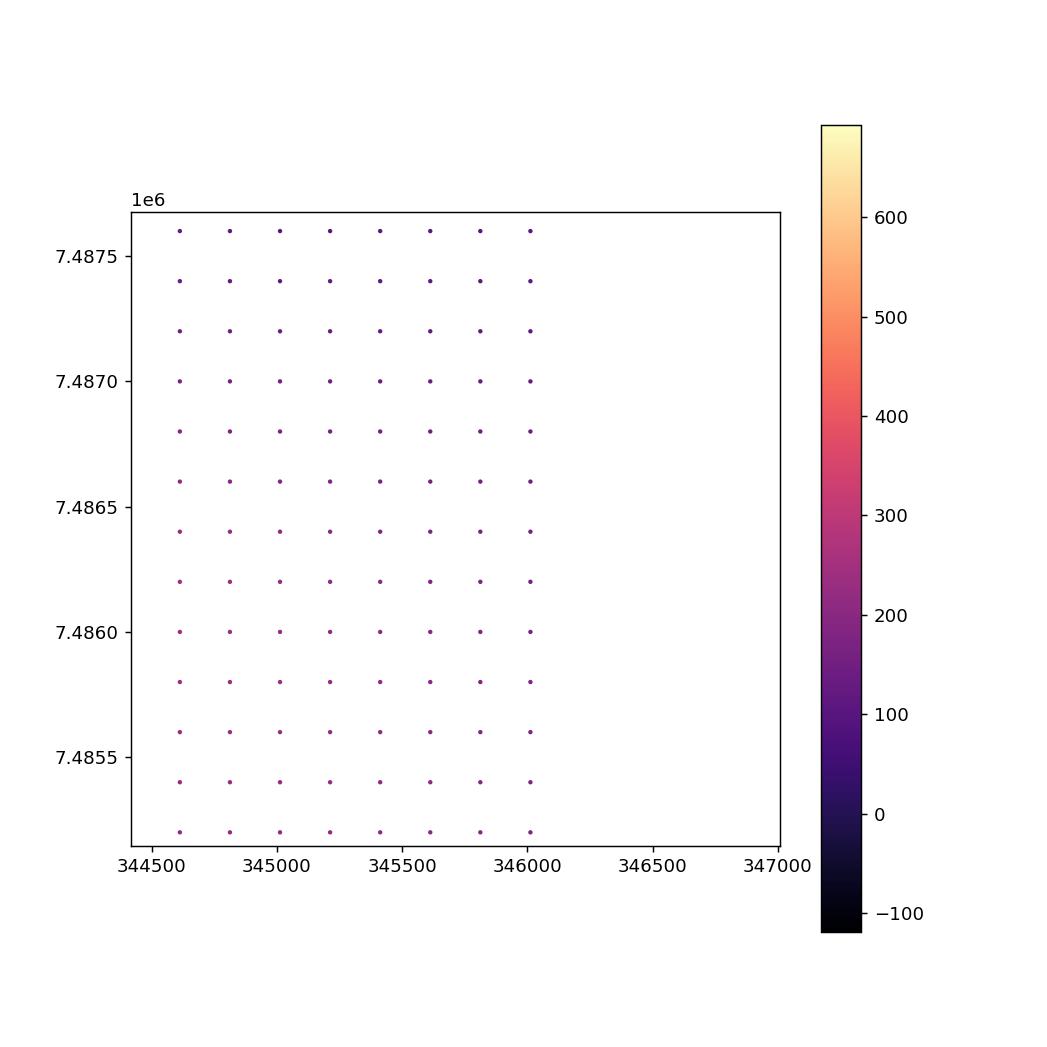

In [33]:
plt.figure(figsize=(8,8))
plt.scatter(grid_coords[0], grid_coords[1],
            c=grid_MAGR,
            cmap='magma',
            s=2)
plt.axis('scaled')
plt.colorbar()

In [34]:
grid = spline.grid(spacing=250, data_names=['MAGR'])
grid

<xarray.Dataset>
Dimensions:   (easting: 145, northing: 180)
Coordinates:
  * easting   (easting) float64 3.101e+05 3.104e+05 ... 3.458e+05 3.46e+05
  * northing  (northing) float64 7.465e+06 7.465e+06 ... 7.51e+06 7.51e+06
Data variables:
    MAGR      (northing, easting) float64 95.36 95.96 97.12 ... 319.4 323.4
Attributes:
    metadata:  Generated by Spline()

<IPython.core.display.Javascript object>


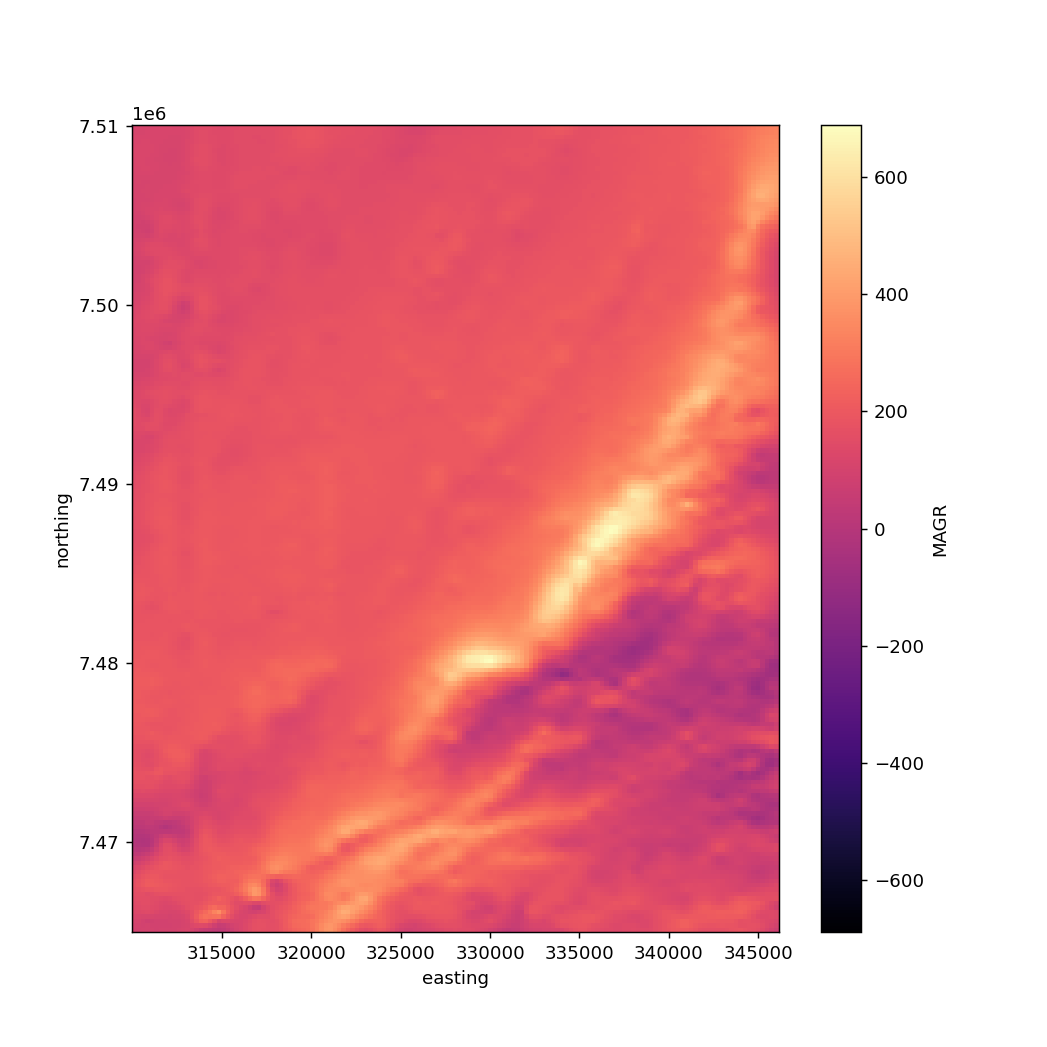

(310008.2418710947, 346136.28223417146, 7464974.75331204, 7510058.526587531)

In [35]:
grid.MAGR.plot(figsize=(8,8),
               cmap='magma')
plt.axis('scaled')

### Eliminating pixels that are too far from a real surveyed value

In [36]:
grid = vd.distance_mask(coordinates, maxdist=1000, grid=grid)
grid

<xarray.Dataset>
Dimensions:   (easting: 145, northing: 180)
Coordinates:
  * easting   (easting) float64 3.101e+05 3.104e+05 ... 3.458e+05 3.46e+05
  * northing  (northing) float64 7.465e+06 7.465e+06 ... 7.51e+06 7.51e+06
Data variables:
    MAGR      (northing, easting) float64 95.36 95.96 97.12 ... 319.4 323.4
Attributes:
    metadata:  Generated by Spline()

<IPython.core.display.Javascript object>


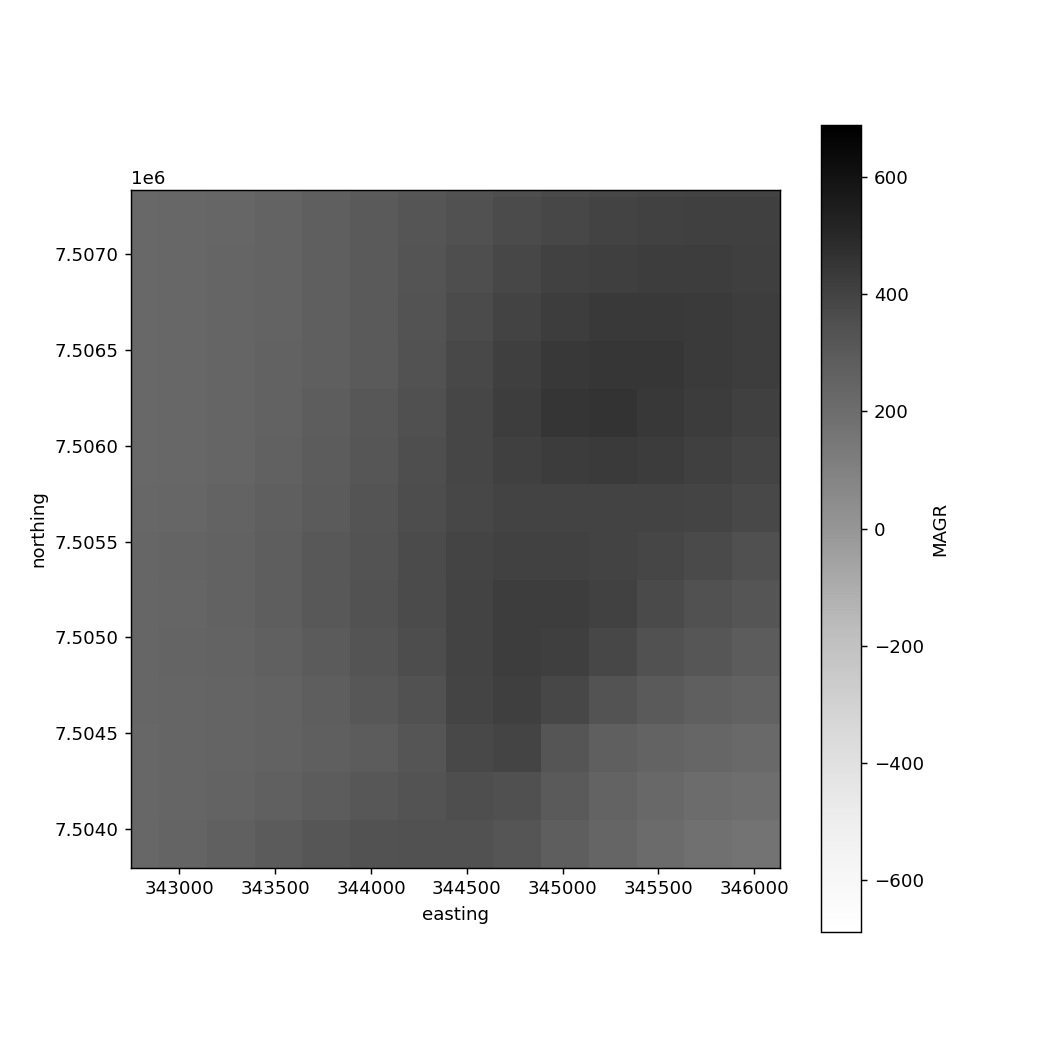

(310008.2418710947, 346136.28223417146, 7464974.75331204, 7510058.526587531)

In [37]:
grid.MAGR.plot(figsize=(8,8),cmap='Greys')
plt.axis('scaled')

##  Chanining operations

###  First we create the chain

In [38]:
chain_MAGR = vd.Chain([
    ('trend',  vd.Trend(degree=5)),
    ('reduce', vd.BlockReduce(np.median, spacing=200)),
    ('spline', vd.Spline()),
])

In [39]:
chain_MAGR

Chain(steps=[('trend', Trend(degree=2)),
             ('reduce',
              BlockReduce(reduction=<function median at 0x7f2a714be5e0>,
                          spacing=200)),
             ('spline', Spline())])

### Then we fit within the chain

In [40]:
chain_MAGR.fit(coordinates, scrr_treino.MAGR)

Chain(steps=[('trend', Trend(degree=2)),
             ('reduce',
              BlockReduce(reduction=<function median at 0x7f2a714be5e0>,
                          spacing=200)),
             ('spline', Spline())])

In [41]:
MAGR_grid = chain_MAGR.grid(spacing=200, data_names=['MAGR'])

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
MAGR_grid = vd.distance_mask(coordinates, maxdist=1000, grid=MAGR_grid)


<IPython.core.display.Javascript object>


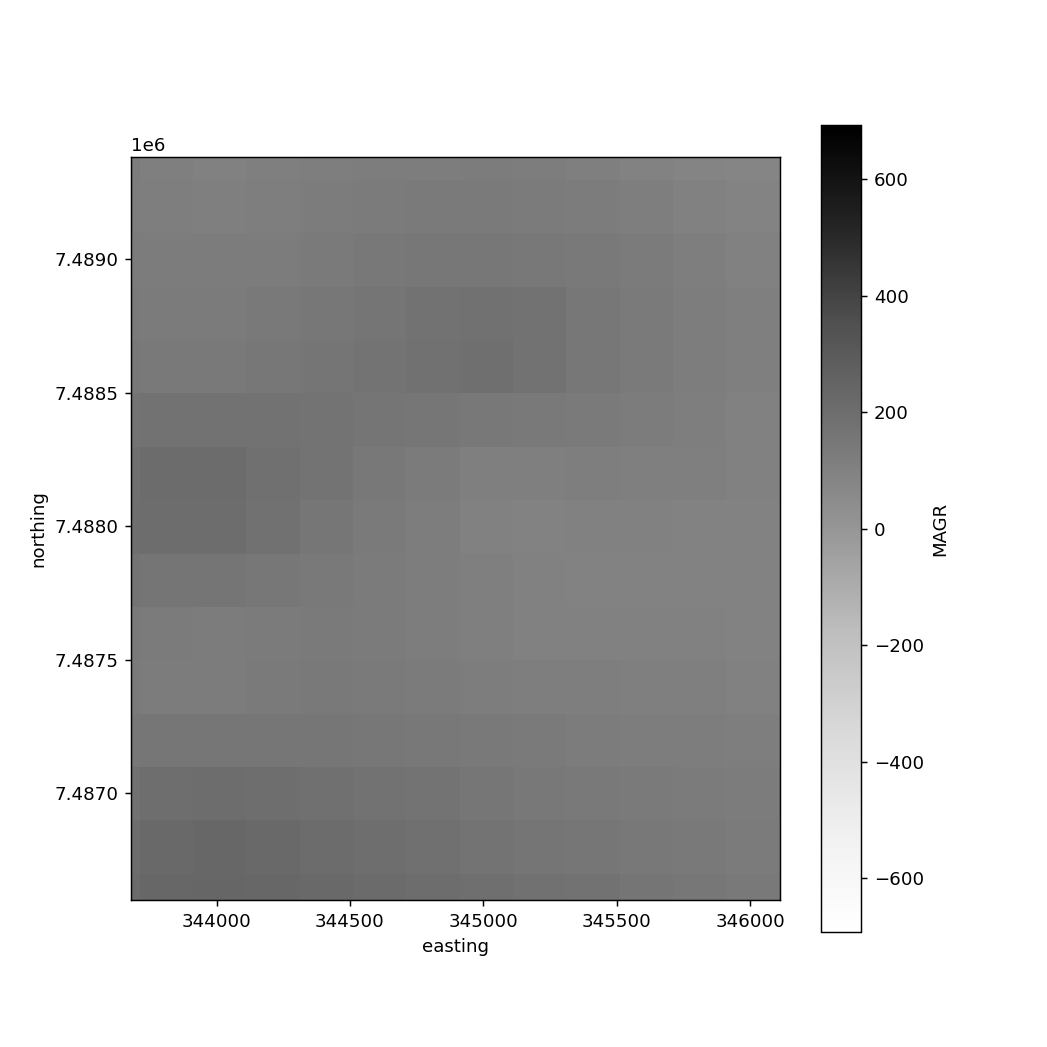

(309932.6081549458, 346111.9161294733, 7464901.36267565, 7510098.384567469)

In [44]:
MAGR_grid.MAGR.plot(figsize=(8,8), cmap='Greys')
plt.axis('scaled')

### Model Validation

In [45]:
train, test = vd.train_test_split(coordinates, scrr_treino.MAGR,
                                 test_size = 0.1)

#### Here we can visualize the train information:
    1- two arrays representing coordinates;
    2- a touple of one array of data training set
    3- a column representing the wheights of the dataset

In [46]:
train

((array([335091.75629251, 311984.20637266, 343946.17502568, ...,
         323980.60949312, 334184.32323308, 321934.64684588]),
  array([7497003.49015453, 7474907.87147139, 7507366.05604874, ...,
         7472615.18746108, 7491148.87841778, 7499194.75487207])),
 (array([190.14, 207.36, 292.34, ..., 309.26, 238.64, 179.18]),),
 (None,))

<IPython.core.display.Javascript object>


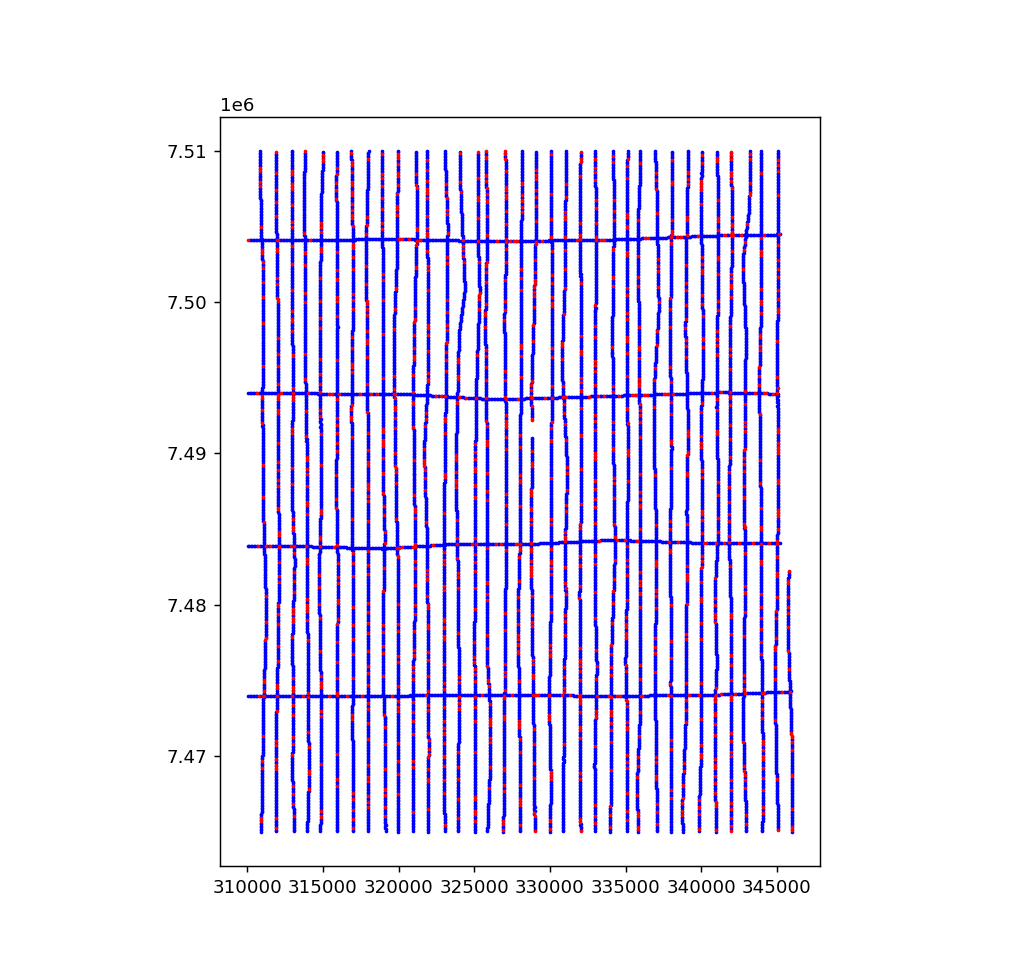

(308233.5798798989, 347810.94440452015, 7462751.504333451, 7512248.242909668)

In [47]:
plt.figure(figsize=(7,7))
plt.plot(train[0][0], train[0][1], '.b', markersize=2)
plt.plot(test[0][0], test[0][1], '.r', markersize=2)
plt.axis('scaled')

In [48]:
chain_MAGR.fit(*train)
# *train   ---> chain.fit(train[0], train[1])

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Chain(steps=[('trend', Trend(degree=2)),
             ('reduce',
              BlockReduce(reduction=<function median at 0x7f2a714be5e0>,
                          spacing=200)),
             ('spline', Spline())])

In [49]:
chain_MAGR.score(*test)

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.9990121689635013

In [50]:
train, test = vd.train_test_split(coordinates, scrr_treino.MAGR, test_size=0.1, spacing=200)

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


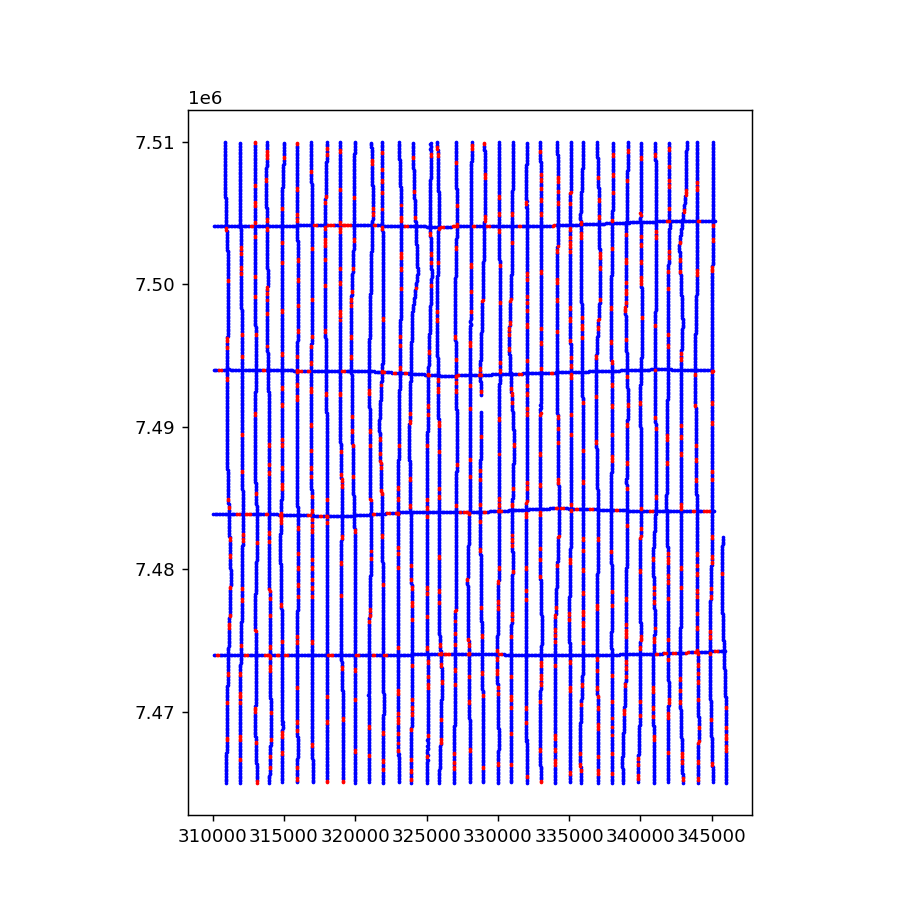

(308233.5798798989, 347810.94440452015, 7462751.504333451, 7512248.242909668)

In [51]:
plt.figure(figsize=(7,7))
plt.plot(train[0][0], train[0][1], '.b', markersize=2)
plt.plot(test[0][0], test[0][1], '.r', markersize=2)
plt.axis('scaled')

In [52]:
chain_MAGR.fit(*train)

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Chain(steps=[('trend', Trend(degree=2)),
             ('reduce',
              BlockReduce(reduction=<function median at 0x7f2a714be5e0>,
                          spacing=200)),
             ('spline', Spline())])

In [53]:
chain_MAGR.score(*test)

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.9961465612156656

###  Cross-Validation

In [54]:
cv     = vd.BlockKFold(spacing=200,
                  n_splits=10,
                  shuffle=True)
scores = vd.cross_val_score(chain_MAGR,
                            coordinates,
                            scrr_treino.MAGR,
                            cv=cv)

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
scores

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0.99594513, 0.9952821 , 0.99689714, 0.99570232, 0.99508055,
       0.99693169, 0.99696499, 0.99619081, 0.99733453, 0.99625598])

<IPython.core.display.Javascript object>


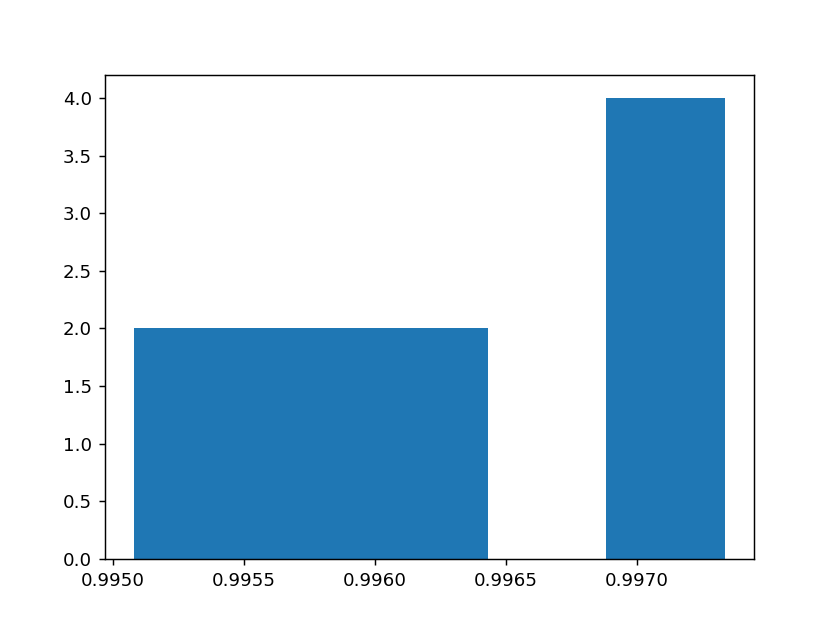

(array([2., 2., 2., 0., 4.]),
 array([0.99508055, 0.99553135, 0.99598214, 0.99643294, 0.99688373,
        0.99733453]),
 <BarContainer object of 5 artists>)

In [56]:
plt.figure()
plt.hist(scores, bins ='auto')

### Now reproducing this fit process for each feature.
It is possible to create a chainned operation with a higher degree trend to interpolate more then 2 dimentions "coordinates x Feature"

In [67]:
chain_CTC = vd.Chain([
    ('trend',  vd.Trend(degree=2)),
    ('reduce', vd.BlockReduce(np.median, spacing=500)),
    ('spline', vd.Spline()),
])

chain_CTC.fit(coordinates, scrr_treino.CTC)

CTC_grid = chain_CTC.grid(spacing=200, data_names=['CTC'])
CTC_grid = vd.distance_mask(coordinates, maxdist=1000, grid=CTC_grid)



/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


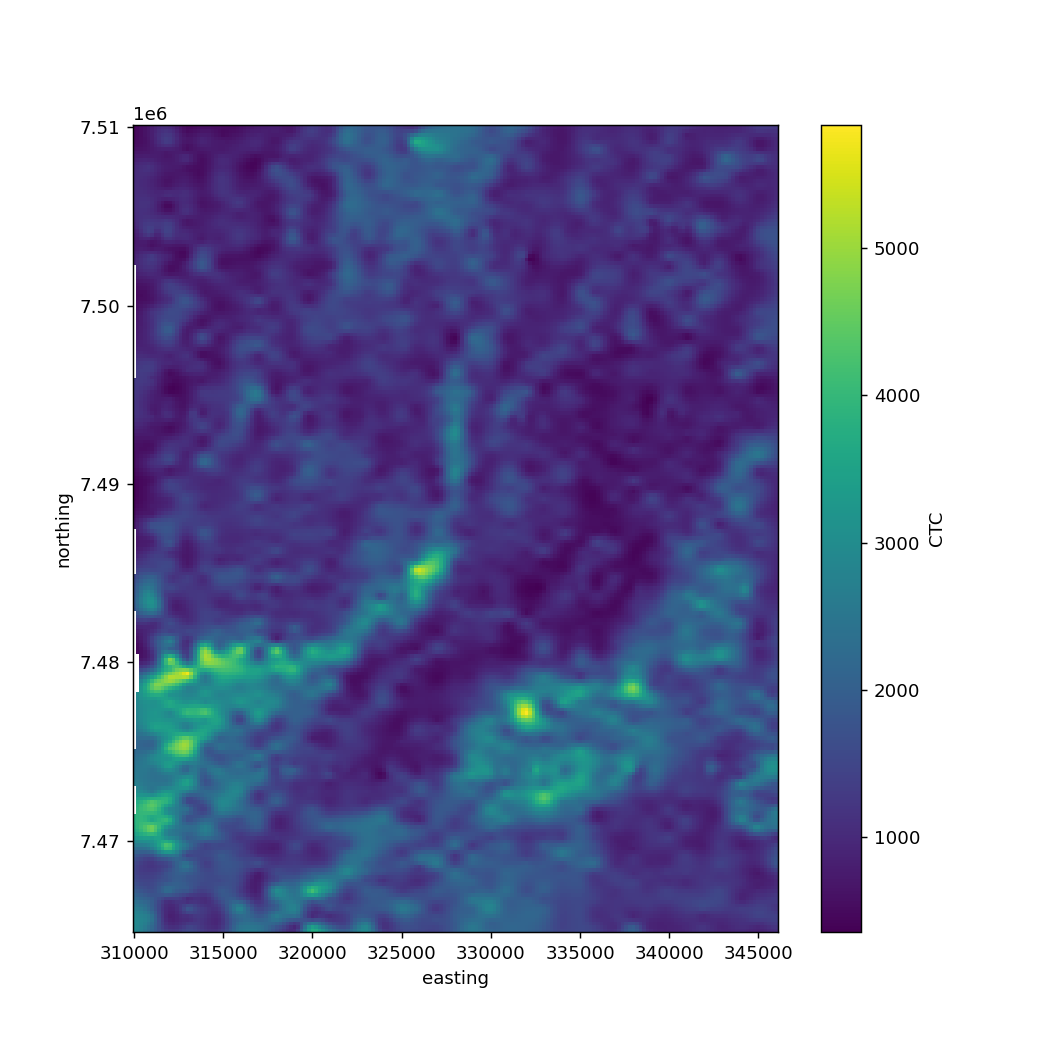

(309932.6081549458, 346111.9161294733, 7464901.36267565, 7510098.384567469)

In [68]:
CTC_grid.CTC.plot(figsize=(8,8), cmap='viridis')
plt.axis('scaled')

In [59]:
chain_KC = vd.Chain([
    ('trend',  vd.Trend(degree=2)),
    ('reduce', vd.BlockReduce(np.median, spacing=200)),
    ('spline', vd.Spline()),
])

chain_KC.fit(coordinates, scrr_treino.KC)

KC_grid = chain_KC.grid(spacing=200, data_names=['KC'])
KC_grid = vd.distance_mask(coordinates, maxdist=1000, grid=KC_grid)

In [60]:
chain_THC = vd.Chain([
    ('trend',  vd.Trend(degree=2)),
    ('reduce', vd.BlockReduce(np.median, spacing=200)),
    ('spline', vd.Spline()),
])

chain_THC.fit(coordinates, scrr_treino.THC)

THC_grid = chain_THC.grid(spacing=200, data_names=['THC'])
THC_grid = vd.distance_mask(coordinates, maxdist=1000, grid=THC_grid)

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
chain_UC = vd.Chain([
    ('trend',  vd.Trend(degree=2)),
    ('reduce', vd.BlockReduce(np.median, spacing=200)),
    ('spline', vd.Spline()),
])

chain_UC.fit(coordinates, scrr_treino.UC)

UC_grid = chain_UC.grid(spacing=200, data_names=['UC'])
UC_grid = vd.distance_mask(coordinates, maxdist=1000, grid=UC_grid)

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Now Ploting the grids

/home/grl/anaconda3/envs/graphite/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>


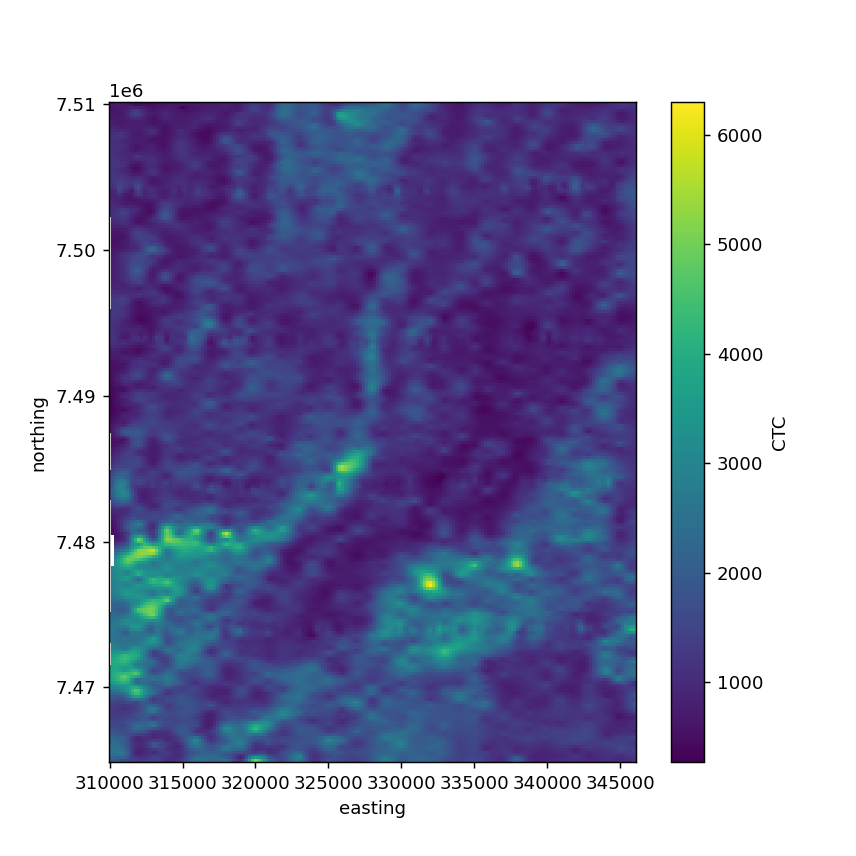

(309932.6081549458, 346111.9161294733, 7464901.36267565, 7510098.384567469)

In [62]:
CTC_grid.CTC.plot(figsize=(6,6), cmap='viridis')
plt.axis('scaled')

<IPython.core.display.Javascript object>


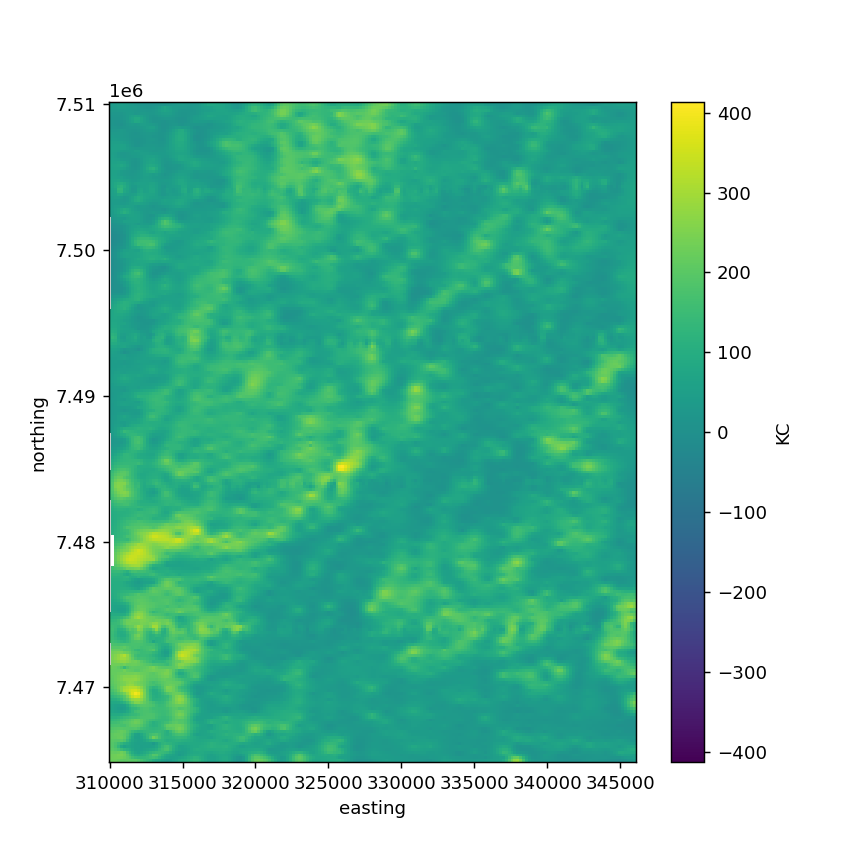

(309932.6081549458, 346111.9161294733, 7464901.36267565, 7510098.384567469)

In [63]:
#KC_scale = vd.maxabs(KC_grid.KC)

KC_grid.KC.plot(figsize=(6,6), cmap='viridis')
plt.axis('scaled')

<IPython.core.display.Javascript object>


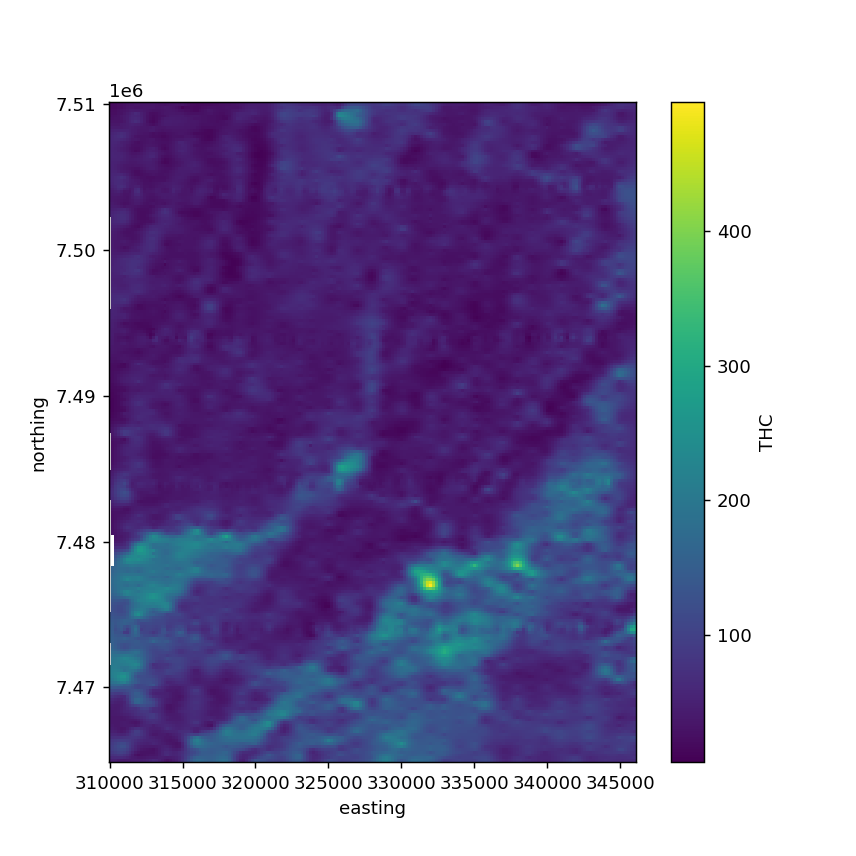

(309932.6081549458, 346111.9161294733, 7464901.36267565, 7510098.384567469)

In [64]:
THC_grid.THC.plot(figsize=(6,6), cmap='viridis')
plt.axis('scaled')

### Negative values were present.

<IPython.core.display.Javascript object>


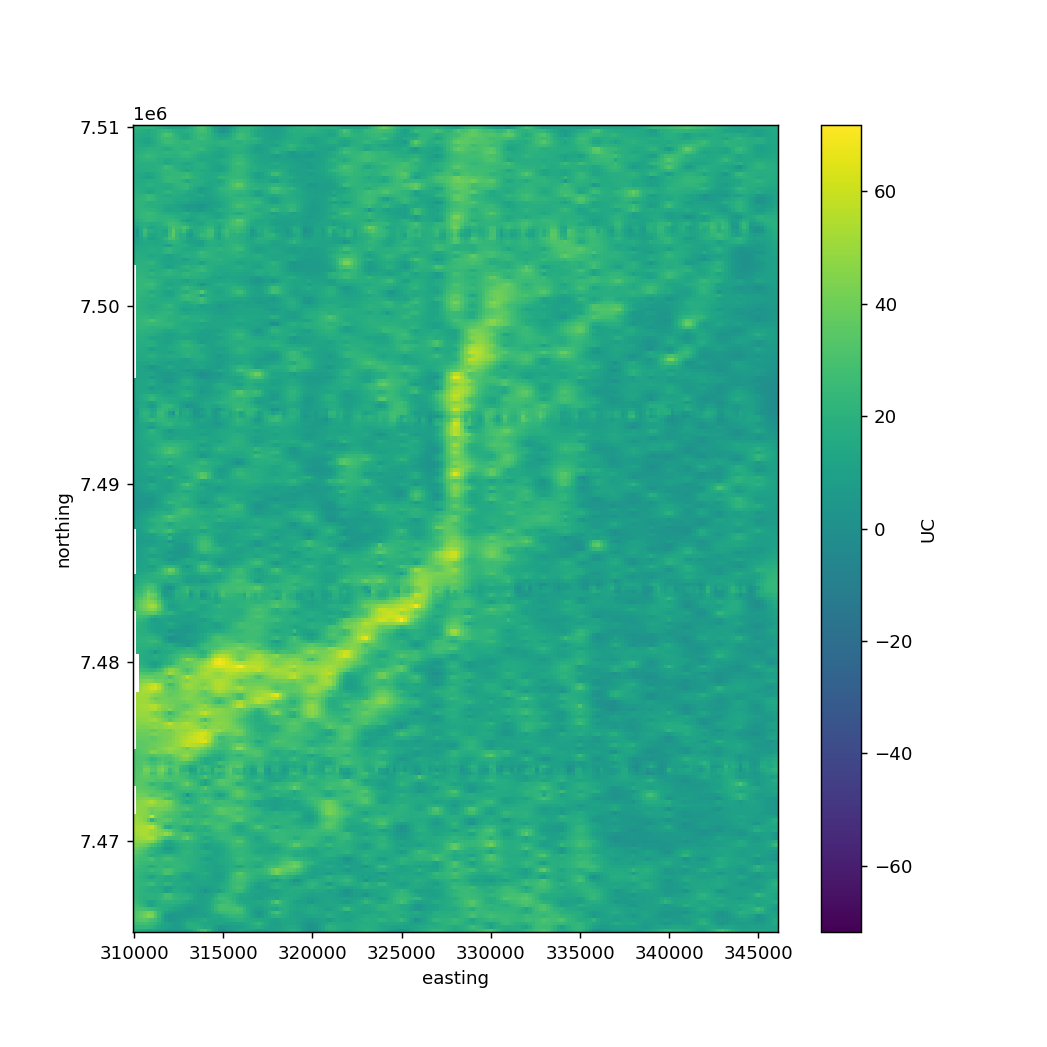

(309932.6081549458, 346111.9161294733, 7464901.36267565, 7510098.384567469)

In [69]:
UC_grid.UC.plot(figsize=(8,8), cmap='viridis')
plt.axis('scaled')

### Saving the grid to a organized database

In [72]:
MAGR_grid.to_netcdf('../resources/1.5x/database/grid/Socorro/b1000/Socorro_MAGR.nc')
CTC_grid.to_netcdf('../resources/1.5x/database/grid/Socorro/b1000/Socorro_CTC.nc')
UC_grid.to_netcdf('../resources/1.5x/database/grid/Socorro/b1000/Socorro_UC.nc')
THC_grid.to_netcdf('../resources/1.5x/database/grid/Socorro/b1000/Socorro_THC.nc')
KC_grid.to_netcdf('../resources/1.5x/database/grid/Socorro/b1000/Socorro_KC.nc')

In [ ]:
litologia = pd.read_csv('../database/csv/litologia/FScrr_litologia.csv')

In [ ]:
litologia = gpd.read_file('../database/csv/litologia/FScrr_lito_shp.shp')

In [ ]:
litologia

In [ ]:
CTC_grid.CTC.plot(figsize=(6,6), cmap='viridis')
litologia.geometry.plot()
plt.axis('scaled')